In [34]:

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from kneed import KneeLocator
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st


In [2]:
params_weak = pd.read_csv("params_weak.csv")
params_fix = pd.read_csv("params_fix.csv")
params_chang = pd.read_csv("params_chang.csv")
params_weak["treatment"] = "weak"
params_chang["treatment"] = "chang"
params_fix["treatment"] = "fix"
actions = pd.read_csv("actions.csv")


In [3]:
params_fix.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'user', 'type', 'score', 'type_adj', 'score_adj', 'a', 'v', 't', 'z',
       'y', 'y_adj', 'a10', 'v10', 't10', 'z10', 'a20', 'v20', 't20', 'z20',
       'a30', 'v30', 't30', 'z30', 'a40', 'v40', 't40', 'z40', 'a50', 'v50',
       't50', 'z50', 'a60', 'v60', 't60', 'z60', 'a70', 'v70', 't70', 'z70',
       'a80', 'v80', 't80', 'z80', 'a90', 'v90', 't90', 'z90', 'degrees',
       'a_st10', 'v_st10', 't_st10', 'z_st10', 'a_st20', 'v_st20', 't_st20',
       'z_st20', 'a_st30', 'v_st30', 't_st30', 'z_st30', 'a_st40', 'v_st40',
       't_st40', 'z_st40', 'a_st50', 'v_st50', 't_st50', 'z_st50', 'a_st60',
       'v_st60', 't_st60', 'z_st60', 'a_st70', 'v_st70', 't_st70', 'z_st70',
       'a_st80', 'v_st80', 't_st80', 'z_st80', 'a_st90', 'v_st90', 't_st90',
       'z_st90', 'a_st100', 'v_st100', 't_st100', 'z_st100', 'a100', 'v100',
       't100', 'z100', 'treatment'],
      dtype='object')

In [4]:
curve_w = params_weak.mean()[["a10","a20","a30","a40","a50","a60","a70","a80","a90","a100"]]
curve_f = params_fix.mean()[["a10","a20","a30","a40","a50","a60","a70","a80","a90","a100"]]
curve_c = params_chang.mean()[["a10","a20","a30","a40","a50","a60","a70","a80","a90","a100"]]

In [5]:
#Receives a list of players to show
def get_params(param, players, treatment, column2 = None):
    param_cols = ["%s%d" % t for t in zip([param] * 10, [x*10 for x in range(1, 10+1)])]
    param_sd = ["%s_st%d" % t for t in zip([param] * 10, [x*10 for x in range(1, 10+1)])] 
    params = pd.melt(treatment.loc[treatment.user.isin(players)], id_vars=['user'], value_vars = param_cols)
    sds = pd.melt(treatment.loc[treatment.user.isin(players)], id_vars=['user'], value_vars = param_sd)
    d = params.groupby("variable").mean()
    d.index = pd.to_numeric(d.index.str.replace(param, ""))
    d_sd = sds.groupby("variable").mean()
    d_sd.index = pd.to_numeric(d_sd.index.str.replace("%s_st" % (param), ""))
    d_sd["round"] = d_sd.index
    d["round"] = d.index
    d = d.merge(d_sd, on = "round")
    d = d.sort_values(by="round")
    d.rename(columns = {"value_x":param, "value_y":"std"}, inplace=True)
    return d

In [6]:
knee_w = KneeLocator(list(range(10,110, 10)), curve_w, S=1.0, curve="convex", direction="decreasing")
knee_f = KneeLocator(list(range(10,110, 10)), curve_f, S=1.0, curve="convex", direction="decreasing")
knee_c = KneeLocator(list(range(10,110, 10)), curve_c, S=1.0, curve="convex", direction="decreasing")

<Figure size 720x720 with 0 Axes>

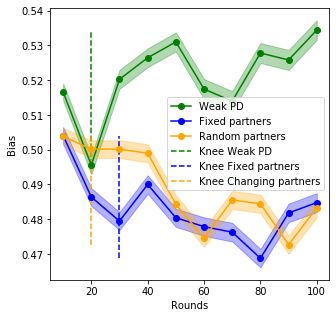

In [7]:
param = "z"

curve_w = params_weak.mean()[["%s%d" % t for t in zip([param] * 10, [x*10 for x in range(1, 10+1)])]]
curve_f = params_fix.mean()[["%s%d" % t for t in zip([param] * 10, [x*10 for x in range(1, 10+1)])]]
curve_c = params_chang.mean()[["%s%d" % t for t in zip([param] * 10, [x*10 for x in range(1, 10+1)])]]

knee_w = KneeLocator(list(range(10,110, 10)), curve_w, S=1.0, curve="convex", direction="decreasing")
knee_f = KneeLocator(list(range(10,110, 10)), curve_f, S=1.0, curve="convex", direction="decreasing")
knee_c = KneeLocator(list(range(10,110, 10)), curve_c, S=1.0, curve="convex", direction="decreasing")

weak = get_params(param, actions.user, params_weak)
chang = get_params(param, actions.user, params_chang)
fix = get_params(param, actions.user, params_fix)

errWeak = weak["std"] / np.sqrt(5000)
errChang = chang["std"] / np.sqrt(5000)
errFix = fix["std"] / np.sqrt(5000)


plt.figure(figsize = (10,10))
plt.figure(figsize=(5,5))
plt.plot(weak["round"], weak[param],"-o",label = "Weak PD", color = "green")
plt.plot(fix["round"], fix[param],"-o",label = "Fixed partners", color = "blue")
plt.plot(chang["round"], chang[param],"-o",label = "Random partners", color = "orange")
plt.fill_between(weak["round"], weak[param] + (errWeak * 1.96), weak[param] - (errWeak * 1.96), alpha = 0.3, color = "green")
plt.fill_between(fix["round"], fix[param] + (errFix * 1.96), fix[param] - (errFix * 1.96), alpha = 0.3, color = "blue")
plt.fill_between(chang["round"], chang[param] + (errChang * 1.96), chang[param] - (errChang * 1.96), alpha = 0.3, color = "orange")
plt.vlines(knee_w.knee, weak[param].min(), weak[param].max(), linestyles="--", color = "green", label = "Knee Weak PD")
plt.vlines(knee_f.knee, fix[param].min(), fix[param].max(), linestyles="--", color = "blue", label = "Knee Fixed partners")
plt.vlines(knee_c.knee, chang[param].min(), chang[param].max(), linestyles="--", color = "orange", label = "Knee Changing partners")
plt.xlabel("Rounds")
plt.ylabel("Bias")
plt.legend()

Text(0.5, 1.0, '-0.167869, 0.102080')

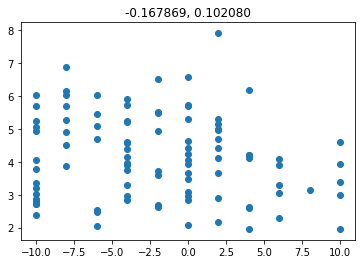

In [8]:
plt.scatter(actions.loc[actions.treatment == "changing", "score10"], params_chang.a10)
plt.title("%f, %f" % st.pearsonr(actions.loc[actions.treatment == "changing", "score10"], params_chang.a10))

Text(0.5, 1.0, '-0.188582, 0.065759')

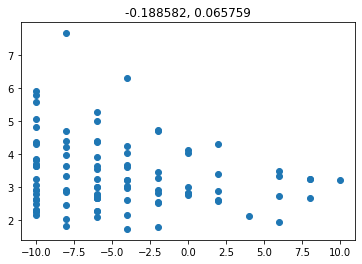

In [9]:
plt.scatter(actions.loc[actions.treatment == "changing", "score20"], params_chang.a20)
plt.title("%f, %f" % st.pearsonr(actions.loc[actions.treatment == "changing", "score20"], params_chang.a20))

Text(0.5, 1.0, '-0.199485, 0.051346')

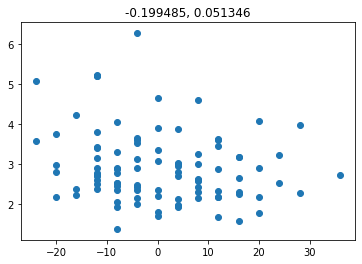

In [10]:
plt.scatter(actions.loc[actions.treatment == "changing", "score_adj30"], params_chang.a30)
plt.title("%f, %f" % st.pearsonr(actions.loc[actions.treatment == "changing", "score_adj30"], params_chang.a30))

In [49]:
def plot_param (treatment, param, score, absolute = False):
    params = {"fix":params_fix,"chang":params_chang, "weak":params_weak}
    param_set = params[treatment]
    if absolute:
        param_values = np.abs(param_set[param])
    else: param_values = param_set[param]
    plt.scatter(param_set[score], param_values)
    plt.title("%f, %f" % st.pearsonr(param_set[score], param_values))

In [50]:
interact(plot_param, treatment=[('fix', "fix"), ('changing', "chang"), ('weak', "weak")], 
         param = [('Threshold', "a"), ('Drift Speed', 'v'), ('Bias', 'z')], 
         score= [('s1', "score"), ('s2', "score_adj")])

interactive(children=(Dropdown(description='treatment', options=(('fix', 'fix'), ('changing', 'chang'), ('weak…

<function __main__.plot_param(treatment, param, score, absolute=False)>

In [41]:
exec("params_fix")

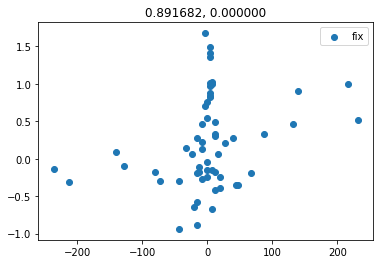

In [21]:
plt.scatter(params_fix.score_adj, params_fix.v, label = "fix")
plt.title("%f, %f" % st.pearsonr(params_fix.score, params_fix.v))
plt.legend()

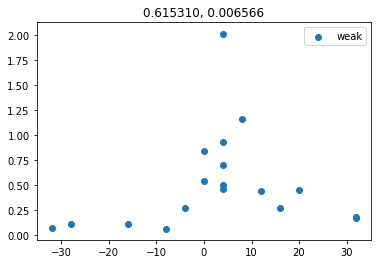

In [22]:
plt.scatter(params_weak.score_adj, np.abs(params_weak.v), label = "weak")
plt.title("%f, %f" % st.pearsonr(params_weak.score, params_weak.v))
plt.legend()

In [98]:
param_names = {"a": "Threshold", "v":"Drift Speed", "z": "Threshold"}

<Figure size 720x720 with 0 Axes>

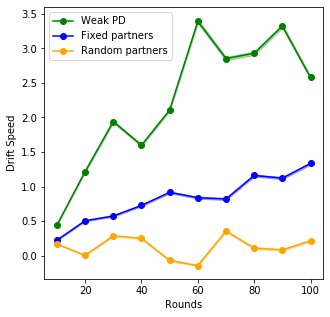

In [106]:
param = "v"
soc_fix = get_params(param, actions.loc[actions.type_adj == "Pro-social", "user"], params_fix)
soc_ch = get_params(param, actions.loc[actions.type_adj == "Pro-social", "user"], params_chang)
soc_we = get_params(param, actions.loc[actions.type_adj == "Pro-social", "user"], params_weak)
errWeak = soc_we["std"] / np.sqrt(5000)
errChang = soc_ch["std"] / np.sqrt(5000)
errFix = soc_fix["std"] / np.sqrt(5000)

plt.figure(figsize = (10,10))
plt.figure(figsize=(5,5))
plt.plot(soc_we["round"], soc_we[param],"-o",label = "Weak PD", color = "green")
plt.plot(soc_fix["round"], soc_fix[param],"-o",label = "Fixed partners", color = "blue")
plt.plot(soc_ch["round"], soc_ch[param],"-o",label = "Random partners", color = "orange")
plt.fill_between(soc_we["round"], soc_we[param] + (errWeak * 1.96), soc_we[param] - (errWeak * 1.96), alpha = 0.3, color = "green")
plt.fill_between(soc_fix["round"], soc_fix[param] + (errFix * 1.96), soc_fix[param] - (errFix * 1.96), alpha = 0.3, color = "blue")
plt.fill_between(soc_ch["round"], soc_ch[param] + (errChang * 1.96), soc_ch[param] - (errChang * 1.96), alpha = 0.3, color = "orange")
plt.xlabel("Rounds")
plt.ylabel(param_names[param])
plt.legend()

<Figure size 720x720 with 0 Axes>

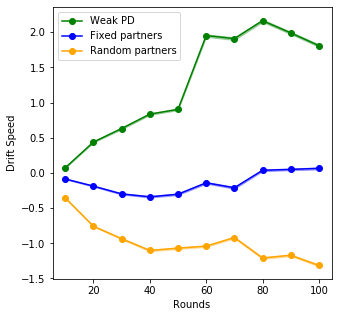

In [107]:
param = "v"
selfix = get_params(param, actions.loc[actions.type_adj == "Pro-self", "user"], params_fix)
selch = get_params(param, actions.loc[actions.type_adj == "Pro-self", "user"], params_chang)
selwe = get_params(param, actions.loc[actions.type_adj == "Pro-self", "user"], params_weak)
errWeak = selwe["std"] / np.sqrt(5000)
errChang = selch["std"] / np.sqrt(5000)
errFix = selfix["std"] / np.sqrt(5000)

plt.figure(figsize = (10,10))
plt.figure(figsize=(5,5))
plt.plot(selwe["round"], selwe[param],"-o",label = "Weak PD", color = "green")
plt.plot(selfix["round"], selfix[param],"-o",label = "Fixed partners", color = "blue")
plt.plot(selch["round"], selch[param],"-o",label = "Random partners", color = "orange")
plt.fill_between(selwe["round"], selwe[param] + (errWeak * 1.96), selwe[param] - (errWeak * 1.96), alpha = 0.3, color = "green")
plt.fill_between(selfix["round"], selfix[param] + (errFix * 1.96), selfix[param] - (errFix * 1.96), alpha = 0.3, color = "blue")
plt.fill_between(selch["round"], selch[param] + (errChang * 1.96), selch[param] - (errChang * 1.96), alpha = 0.3, color = "orange")
plt.xlabel("Rounds")
plt.ylabel(param_names[param])
plt.legend()

<Figure size 720x720 with 0 Axes>

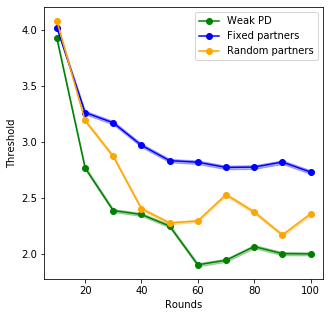

In [96]:
param = "a"
soc_fix = get_params(param, actions.loc[actions["type"] == "Pro-social", "user"], params_fix)
soc_ch = get_params(param, actions.loc[actions["type"] == "Pro-social", "user"], params_chang)
soc_we = get_params(param, actions.loc[actions["type"] == "Pro-social", "user"], params_weak)
errWeak = soc_we["std"] / np.sqrt(5000)
errChang = soc_ch["std"] / np.sqrt(5000)
errFix = soc_fix["std"] / np.sqrt(5000)

plt.figure(figsize = (10,10))
plt.figure(figsize=(5,5))
plt.plot(soc_we["round"], soc_we[param],"-o",label = "Weak PD", color = "green")
plt.plot(soc_fix["round"], soc_fix[param],"-o",label = "Fixed partners", color = "blue")
plt.plot(soc_ch["round"], soc_ch[param],"-o",label = "Random partners", color = "orange")
plt.fill_between(soc_we["round"], soc_we[param] + (errWeak * 1.96), soc_we[param] - (errWeak * 1.96), alpha = 0.3, color = "green")
plt.fill_between(soc_fix["round"], soc_fix[param] + (errFix * 1.96), soc_fix[param] - (errFix * 1.96), alpha = 0.3, color = "blue")
plt.fill_between(soc_ch["round"], soc_ch[param] + (errChang * 1.96), soc_ch[param] - (errChang * 1.96), alpha = 0.3, color = "orange")
plt.xlabel("Rounds")
plt.ylabel("Threshold")
plt.legend()

<Figure size 720x720 with 0 Axes>

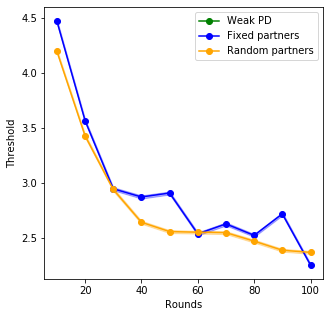

In [97]:
param = "a"
selfix = get_params(param, actions.loc[actions["type"] == "Pro-self", "user"], params_fix)
selch = get_params(param, actions.loc[actions["type"] == "Pro-self", "user"], params_chang)
selwe = get_params(param, actions.loc[actions["type"] == "Pro-self", "user"], params_weak)
errWeak = selwe["std"] / np.sqrt(5000)
errChang = selch["std"] / np.sqrt(5000)
errFix = selfix["std"] / np.sqrt(5000)

plt.figure(figsize = (10,10))
plt.figure(figsize=(5,5))
plt.plot(selwe["round"], selwe[param],"-o",label = "Weak PD", color = "green")
plt.plot(selfix["round"], selfix[param],"-o",label = "Fixed partners", color = "blue")
plt.plot(selch["round"], selch[param],"-o",label = "Random partners", color = "orange")
plt.fill_between(selwe["round"], selwe[param] + (errWeak * 1.96), selwe[param] - (errWeak * 1.96), alpha = 0.3, color = "green")
plt.fill_between(selfix["round"], selfix[param] + (errFix * 1.96), selfix[param] - (errFix * 1.96), alpha = 0.3, color = "blue")
plt.fill_between(selch["round"], selch[param] + (errChang * 1.96), selch[param] - (errChang * 1.96), alpha = 0.3, color = "orange")
plt.xlabel("Rounds")
plt.ylabel("Threshold")
plt.legend()

In [16]:
data = pd.read_csv("data_actions.csv")

In [84]:
players = data.loc[data.treatment == "fix", ["player", "opponent"]]
players = players.drop_duplicates(subset = ["player", "opponent"])
players = players.merge(actions[["user", "type", "type_adj"]], left_on = "player", right_on = "user")
del players["user"]
players['opponent'] = players['opponent'].apply(lambda x: x.replace("['","").replace("']","")) 
players = players.merge(actions[["user", "type", "type_adj"]], left_on = "opponent", right_on = "user")
del players["user"]

<Figure size 720x720 with 0 Axes>

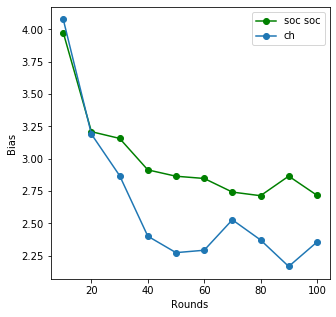

In [92]:
param = "a"
soc_soc = get_params(param, players.loc[(players.type_adj_x == "Pro-social") & (players.type_x == "Pro-social"), "player"], params_fix)
soc_soc_ch = get_params(param, actions.loc[(actions.type_adj == "Pro-social") & (actions["type"] == "Pro-social"), "user"], params_chang)
#soc_sel = get_params(param, players.loc[(players.type_adj_x == "Pro-social") & (players.type_y == "Pro-self"), "player"], params_fix)
#sel_soc = get_params(param, players.loc[(players.type_adj_x == "Pro-self") & (players.type_y == "Pro-social"), "player"], params_fix)
#sel_sel = get_params(param, players.loc[(players.type_adj_x == "Pro-self") & (players.type_x == "Pro-self"), "player"], params_fix)
#errWeak = selwe["std"] / np.sqrt(5000)
#errChang = selch["std"] / np.sqrt(5000)
#errFix = selfix["std"] / np.sqrt(5000)

plt.figure(figsize = (10,10))
plt.figure(figsize=(5,5))
plt.plot(soc_soc["round"], soc_soc[param],"-o",label = "soc soc", color = "green")
plt.plot(soc_soc_ch["round"], soc_soc_ch[param],"-o",label = "ch")
#plt.plot(soc_sel["round"], soc_sel[param],"-o",label = "soc sel", color = "blue")
#plt.plot(sel_soc["round"], sel_soc[param],"-o",label = "sel soc", color = "orange")
#plt.plot(sel_sel["round"], sel_soc[param],"-o",label = "sel sel", color = "red")
#plt.fill_between(selwe["round"], selwe[param] + (errWeak * 1.96), selwe[param] - (errWeak * 1.96), alpha = 0.3, color = "green")
#plt.fill_between(selfix["round"], selfix[param] + (errFix * 1.96), selfix[param] - (errFix * 1.96), alpha = 0.3, color = "blue")
#plt.fill_between(selch["round"], selch[param] + (errChang * 1.96), selch[param] - (errChang * 1.96), alpha = 0.3, color = "orange")
plt.xlabel("Rounds")
plt.ylabel("Bias")
plt.legend()

10     s4m8_usuario5
14     s8n3_usuario4
20     s8n3_usuario5
27     s8n3_usuario3
31    s8n3_usuario15
35    s9n3_usuario12
38     s9n3_usuario3
41    s9n3_usuario11
42    s9n3_usuario16
45     s9n3_usuario1
46    s9n3_usuario17
51    s10n5_usuario6
52    s10n5_usuario8
56    s10n5_usuario7
Name: player, dtype: object

In [74]:
players = data.loc[data.treatment == "changing", ["player", "opponent"]]
players = players.drop_duplicates(subset = ["player", "opponent"])
players = players.merge(actions[["user", "type", "type_adj"]], left_on = "player", right_on = "user")
del players["user"]
players['opponent'] = players['opponent'].apply(lambda x: x.replace("['","").replace("']","")) 
players = players.merge(actions[["user", "type", "type_adj"]], left_on = "opponent", right_on = "user")
del players["user"]
players

,player,opponent,type_x,type_adj_x,type_y,type_adj_y
0,s5m20_usuario1,s5m20_usuario12,Pro-self,Pro-social,Pro-self,Pro-self
1,s5m20_usuario2,s5m20_usuario12,Pro-self,Pro-self,Pro-self,Pro-self
2,s5m20_usuario3,s5m20_usuario12,Pro-social,Pro-social,Pro-self,Pro-self
3,s5m20_usuario4,s5m20_usuario12,Pro-self,Pro-social,Pro-self,Pro-self
4,s5m20_usuario5,s5m20_usuario12,Pro-social,Pro-social,Pro-self,Pro-self
...,...,...,...,...,...,...
1483,s12n11_usuario14,s12n11_usuario1,Pro-self,Pro-self,Pro-social,Pro-social
1484,s12n11_usuario15,s12n11_usuario1,Pro-social,Pro-social,Pro-social,Pro-social
1485,s12n11_usuario16,s12n11_usuario1,Pro-self,Pro-self,Pro-social,Pro-social
1486,s12n11_usuario17,s12n11_usuario1,Pro-social,Pro-social,Pro-social,Pro-social


In [76]:
players.loc[(players.type_adj_x == "Pro-social"), "type_y"].value_counts()

Pro-self      523
Pro-social    132
Name: type_y, dtype: int64

In [82]:
params_fix.loc[params_fix.type_adj == "Pro-self", "a"].mean()

3.418892017217391

In [81]:
params_chang.loc[params_chang.type_adj == "Pro-self", "a"].mean()

3.599771676320061